# Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [ ]:
norvezhskiy_lesnoy_kot_23_19193516.jpg

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio
import scipy.signal
from skimage.color import rgb2hsv, hsv2rgb

In [52]:
img = imageio.imread('nvidia.jpg')

In [53]:
img.shape

(1051, 1518, 3)

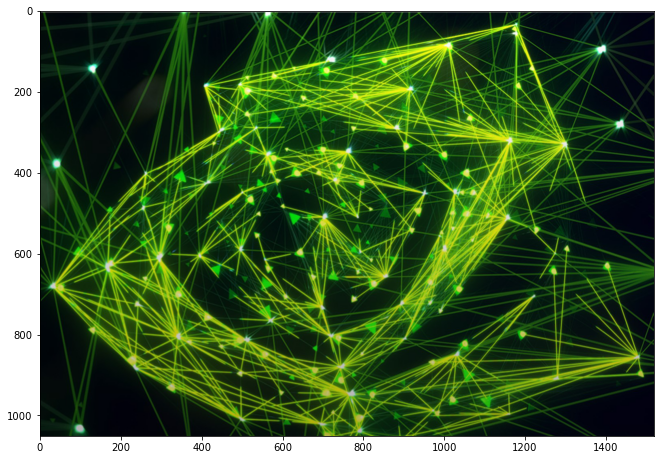

In [54]:
plt.figure(figsize=(11, 11))
plt.imshow(img)

## Линейное уменьшение насыщенности

In [55]:
img_hsv = rgb2hsv(img)

img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv_new)

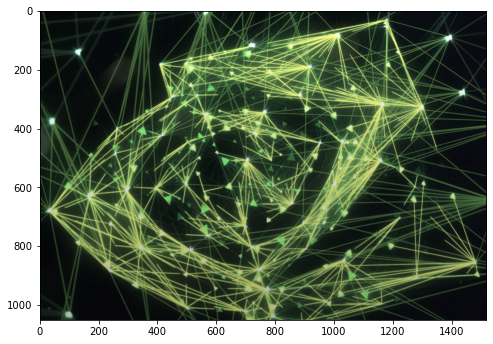

In [56]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Горизонтали

In [57]:
win_size = (3, 3)
core = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

def filter_1(x):
    return abs(np.sum(core * x))

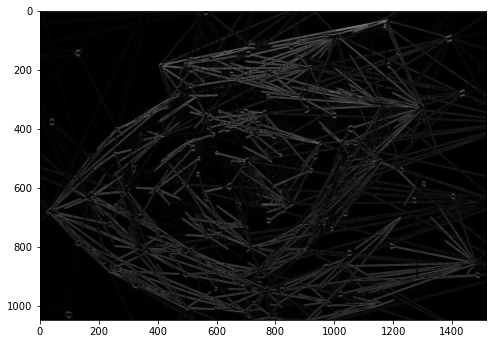

In [58]:
img_copy = np.copy(img[:, :, 0])
img_copy = img_copy.astype(np.float32) / 255.

out_img = np.zeros(
    (img_copy.shape[0] - win_size[0] + 1,
     img_copy.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_copy[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = filter_1(x)
        
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()

## Вертикали

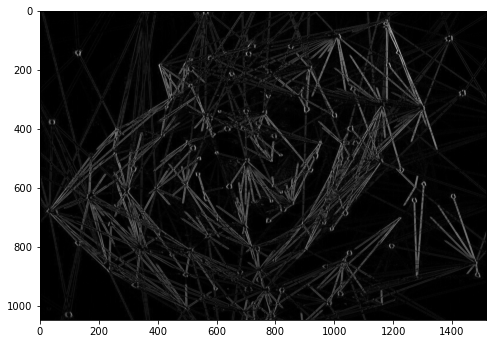

In [59]:
win_size = (3, 3)

core = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)

img_copy = np.copy(img[:, :, 0])
img_copy = img_copy.astype(np.float32) / 255.

out_img = np.zeros(
    (img_copy.shape[0] - win_size[0] + 1,
     img_copy.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_copy[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = filter_1(x)
        
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()